<a href="https://colab.research.google.com/github/markhayes0811/Stock/blob/main/poker_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (Optional) mount Drive if you store code/data there
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plotly for interactive bar chart
!pip install plotly --quiet
import plotly.express as px

# Nice default figure size
plt.rcParams['figure.figsize'] = (8,4)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plotly for interactive bar chart
!pip install plotly --quiet
import plotly.express as px

# Nice default figure size
plt.rcParams['figure.figsize'] = (8,4)


In [ ]:
# Column names: Suit (1–4), Rank (1–13), then Class (0–9)
cols = [
  'Suit1','Rank1','Suit2','Rank2','Suit3','Rank3',
  'Suit4','Rank4','Suit5','Rank5','Class'
]

# Training set (1,025,010 rows)
DATA_URL = (
  'https://archive.ics.uci.edu/ml/'
  'machine-learning-databases/poker/'
  'poker-hand-training-true.data'
)

df = pd.read_csv(DATA_URL, header=None, names=cols)


In [ ]:
# Full shape
print("Full dataset rows:", df.shape[0])

# For plotting speed, sample 20 k rows
df_samp = df.sample(n=20_000, random_state=42)

Full dataset rows: 25010


In [ ]:
# Info & stats on sample
df_samp.info()
df_samp.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 8170 to 19692
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Suit1   20000 non-null  int64
 1   Rank1   20000 non-null  int64
 2   Suit2   20000 non-null  int64
 3   Rank2   20000 non-null  int64
 4   Suit3   20000 non-null  int64
 5   Rank3   20000 non-null  int64
 6   Suit4   20000 non-null  int64
 7   Rank4   20000 non-null  int64
 8   Suit5   20000 non-null  int64
 9   Rank5   20000 non-null  int64
 10  Class   20000 non-null  int64
dtypes: int64(11)
memory usage: 1.8 MB


,count,mean,std,min,25%,50%,75%,max
Suit1,20000.0,2.50625,1.117687,1.0,2.0,3.0,4.0,4.0
Rank1,20000.0,6.98850,3.751623,1.0,4.0,7.0,10.0,13.0
Suit2,20000.0,2.49895,1.121188,1.0,1.0,2.0,4.0,4.0
Rank2,20000.0,7.01740,3.764108,1.0,4.0,7.0,10.0,13.0
Suit3,20000.0,2.50875,1.120128,1.0,2.0,3.0,4.0,4.0
Rank3,20000.0,7.01500,3.743551,1.0,4.0,7.0,10.0,13.0
Suit4,20000.0,2.49525,1.117470,1.0,1.0,2.0,3.0,4.0
Rank4,20000.0,6.95430,3.747948,1.0,4.0,7.0,10.0,13.0
Suit5,20000.0,2.50010,1.114837,1.0,2.0,3.0,3.0,4.0
Rank5,20000.0,6.96395,3.736395,1.0,4.0,7.0,10.0,13.0


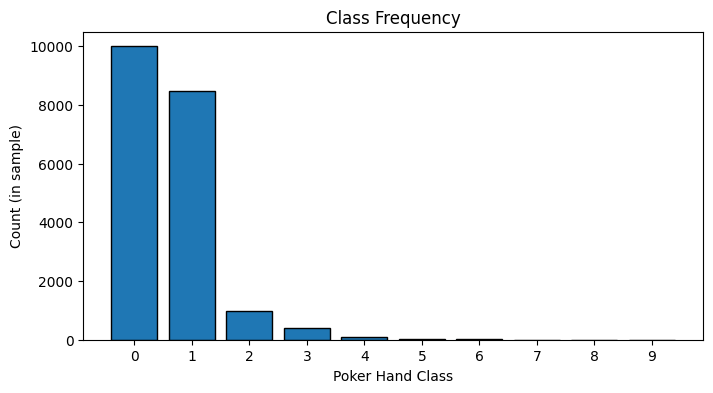

In [ ]:
counts = df_samp['Class'].value_counts().sort_index()
plt.bar(counts.index, counts.values, edgecolor='k')
plt.xticks(counts.index)
plt.xlabel('Poker Hand Class')
plt.ylabel('Count (in sample)')
plt.title('Class Frequency')
plt.show()

In [ ]:
fig = px.bar(
  x=counts.index,
  y=counts.values,
  labels={'x':'Hand Class','y':'Count'},
  title="Poker Hand Class Distribution (sample)"
)
fig.show()

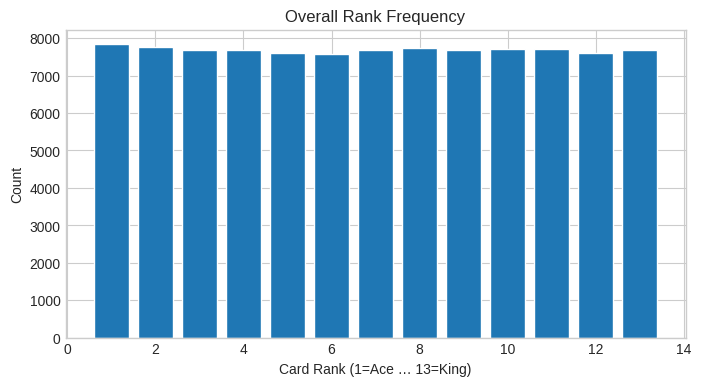

In [ ]:
# Combine all rank columns into one series
ranks = pd.concat([df_samp[f'Rank{i}'] for i in range(1,6)])
rank_counts = ranks.value_counts().sort_index()

plt.bar(rank_counts.index, rank_counts.values, edgecolor='w')
plt.xlabel('Card Rank (1=Ace … 13=King)')
plt.ylabel('Count')
plt.title('Overall Rank Frequency')
plt.show()

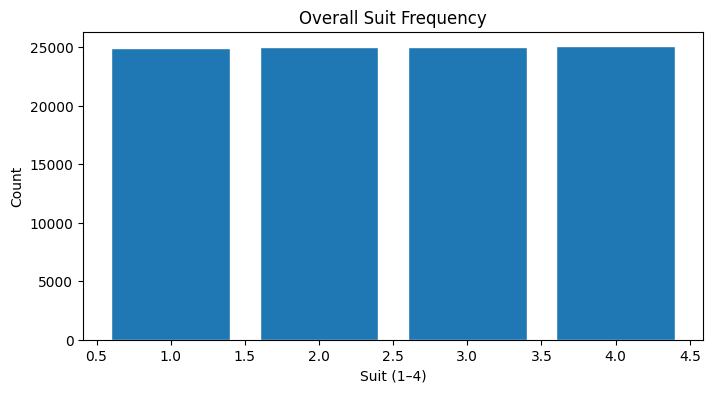

In [ ]:
# Combine suits
suits = pd.concat([df_samp[f'Suit{i}'] for i in range(1,6)])
suit_counts = suits.value_counts().sort_index()

plt.bar(suit_counts.index, suit_counts.values, edgecolor='w')
plt.xlabel('Suit (1–4)')
plt.ylabel('Count')
plt.title('Overall Suit Frequency')
plt.show()

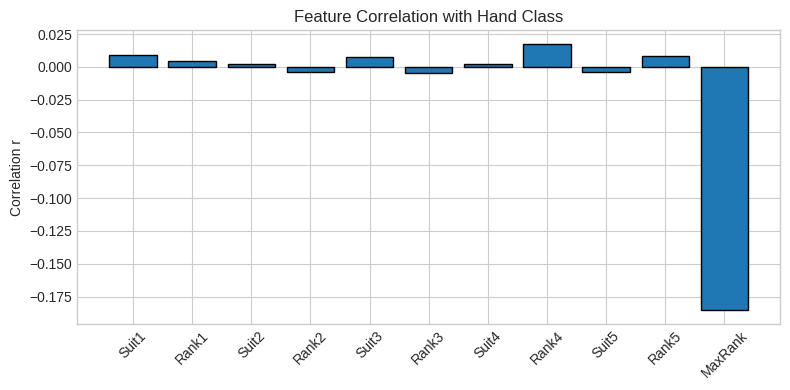

In [ ]:
# Compute Pearson r of each feature vs. Class
corrs = df_samp.corr()['Class'].drop('Class')
plt.bar(corrs.index, corrs.values, edgecolor='k')
plt.xticks(rotation=45)
plt.ylabel('Correlation r')
plt.title('Feature Correlation with Hand Class')
plt.tight_layout()
plt.show()

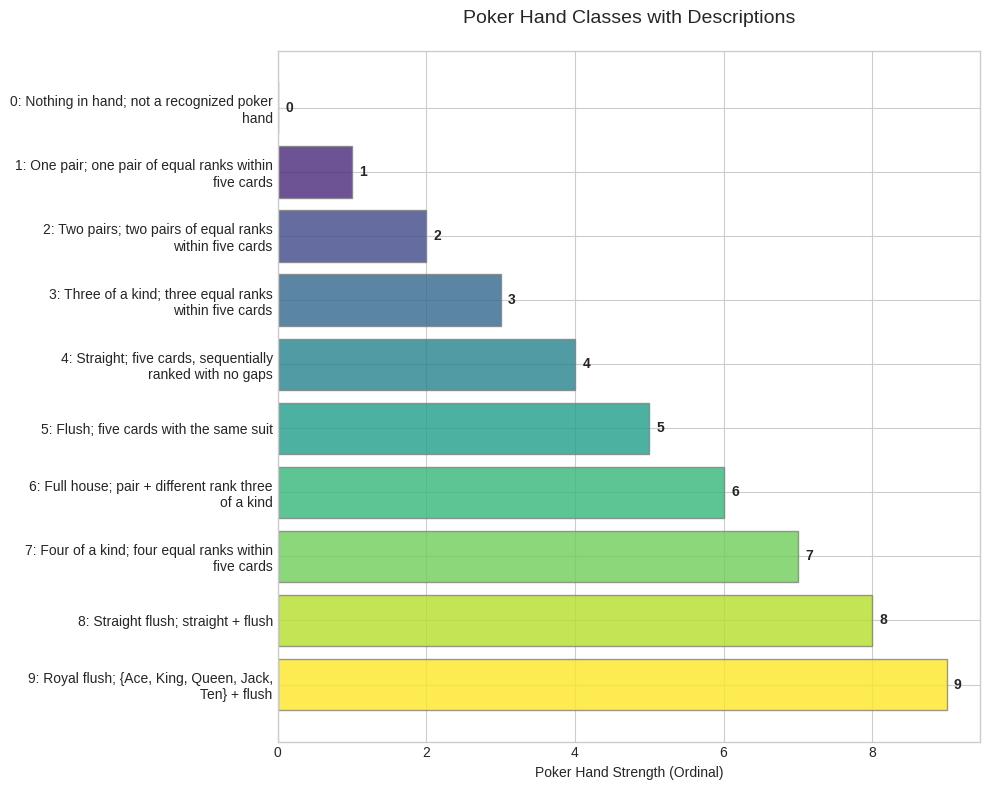

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Define class descriptions
classes = {
    0: "Nothing in hand; not a recognized poker hand",
    1: "One pair; one pair of equal ranks within five cards",
    2: "Two pairs; two pairs of equal ranks within five cards",
    3: "Three of a kind; three equal ranks within five cards",
    4: "Straight; five cards, sequentially ranked with no gaps",
    5: "Flush; five cards with the same suit",
    6: "Full house; pair + different rank three of a kind",
    7: "Four of a kind; four equal ranks within five cards",
    8: "Straight flush; straight + flush",
    9: "Royal flush; {Ace, King, Queen, Jack, Ten} + flush"
}

# Prepare values and wrapped labels
values = list(classes.keys())
labels = [f"{k}: {textwrap.fill(v, width=40)}" for k, v in classes.items()]

# Style and colors
plt.style.use('seaborn-v0_8-whitegrid')
colors = plt.cm.viridis(np.linspace(0, 1, len(values)))

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(values, values, color=colors, edgecolor='gray', alpha=0.8)
ax.set_yticks(values)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # highest class on top

# Add value labels
for idx, value in enumerate(values):
    ax.text(value + 0.1, idx, str(value), va='center', fontweight='bold')

# Labels & title
ax.set_xlabel("Poker Hand Strength (Ordinal)")
ax.set_title("Poker Hand Classes with Descriptions", pad=20, fontsize=14)

plt.tight_layout()
plt.show()

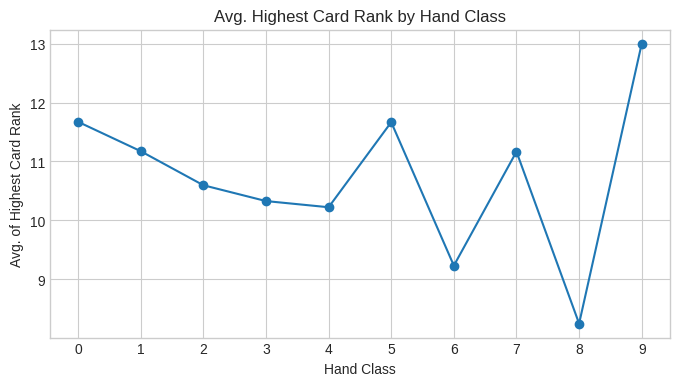

In [ ]:
df_samp['MaxRank'] = df_samp[[f'Rank{i}' for i in range(1,6)]].max(axis=1)

# Pivot: average MaxRank per Class
avg_max = df_samp.groupby('Class')['MaxRank'].mean()

plt.plot(avg_max.index, avg_max.values, marker='o')
plt.xticks(avg_max.index)
plt.xlabel('Hand Class')
plt.ylabel('Avg. of Highest Card Rank')
plt.title('Avg. Highest Card Rank by Hand Class')
plt.show()

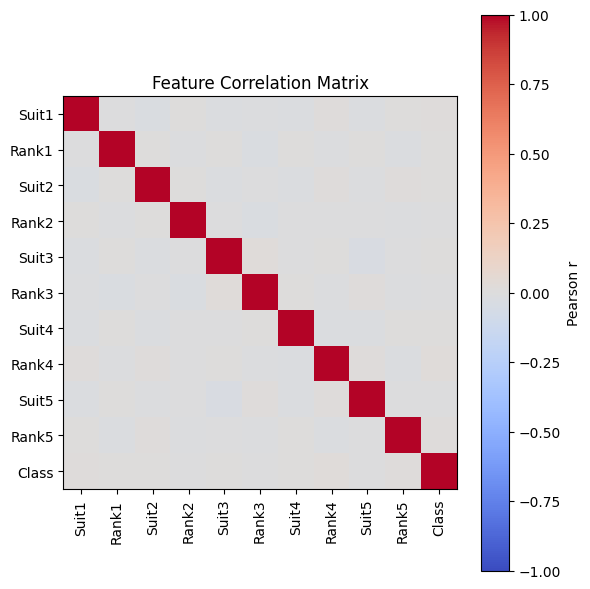

In [ ]:
# Numeric columns only
num_cols = [c for c in df_samp.columns if c.startswith(('Suit','Rank','Class'))]
corr_mat = df_samp[num_cols].corr()

plt.figure(figsize=(6,6))
plt.imshow(corr_mat, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Pearson r')
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

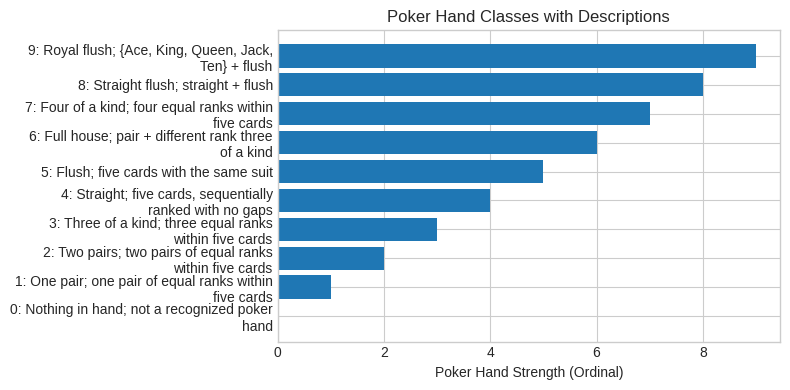

In [ ]:
import matplotlib.pyplot as plt
import textwrap

# Define class descriptions
classes = {
    0: "Nothing in hand; not a recognized poker hand",
    1: "One pair; one pair of equal ranks within five cards",
    2: "Two pairs; two pairs of equal ranks within five cards",
    3: "Three of a kind; three equal ranks within five cards",
    4: "Straight; five cards, sequentially ranked with no gaps",
    5: "Flush; five cards with the same suit",
    6: "Full house; pair + different rank three of a kind",
    7: "Four of a kind; four equal ranks within five cards",
    8: "Straight flush; straight + flush",
    9: "Royal flush; {Ace, King, Queen, Jack, Ten} + flush"
}

# Prepare labels with wrapped text
values = list(classes.keys())
labels = [f"{k}: {textwrap.fill(v, width=40)}" for k, v in classes.items()]

# Plot horizontal bar chart\ nplt.figure(figsize=(10, 8))
plt.barh(values, values)
plt.yticks(values, labels)
plt.xlabel("Poker Hand Strength (Ordinal)")
plt.title("Poker Hand Classes with Descriptions")
plt.tight_layout()
plt.show()

In [ ]:
# 1) Install & import
!pip install plotly --quiet
import plotly.express as px

# Ensure MaxRank exists
if 'MaxRank' not in df.columns:
    df['MaxRank'] = df[[f'Rank{i}' for i in range(1,6)]].max(axis=1)

In [28]:
# 2) Interactive histogram of MaxRank by Class
fig = px.histogram(
    df,
    x='MaxRank',
    color='Class',
    barmode='group',
    nbins=13,
    title='Distribution of Maximum Card Rank by Poker Hand Class',
    labels={'MaxRank':'Max Card Rank','Class':'Hand Class'}
)
fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),
    legend_title_text='Hand Class'
)
fig.show()

# 3) Sunburst of 5‑card rank combinations
combo_counts = (
    df
    .groupby([f'Rank{i}' for i in range(1,6)])
    .size()
    .reset_index(name='count')
)

fig2 = px.sunburst(
    combo_counts,
    path=[f'Rank{i}' for i in range(1,6)],
    values='count',
    title='Sunburst of 5‑Card Rank Combinations'
)
# (optional) limit depth to first 3 levels for readability
# fig2.update_traces(maxdepth=3)
fig2.show()
